In [43]:
# Import SQL Alchemy engine
from sqlalchemy import create_engine
import pandas as pd
from scipy.stats.stats import ttest_ind
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

In [44]:
# Database credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

# use credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, 
    postgres_pw, postgres_host, postgres_port, postgres_db))

df_studentsperformance = pd.read_sql_query('select * from studentsperformance',con=engine)
engine.dispose()

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?
2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
3. Does the test preparation course seem to have an effect on the exam performances?
4. Which 2 exam scores are most correlated with each other?

### 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [45]:
df_studentsperformance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [46]:
df_studentsperformance.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [47]:
df_gender_perform = df_studentsperformance.groupby('gender').mean()[['math score', 'reading score', 'writing score']]
df_gender_perform.head()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [48]:
ttest_ind(df_studentsperformance[df_studentsperformance.gender == "female"][["math score", "reading score", "writing score"]],
          df_studentsperformance[df_studentsperformance.gender == "male"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-5.38324587,  7.95930801,  9.97955791]), pvalue=array([9.12018555e-08, 4.68053874e-15, 2.01987771e-22]))

The pvalues suggest the data is likely to be quality and there are significant differences between the groups. It seems females performed better at reading and writing and males performed better at math.

In [49]:
df_ethnicity_perform = df_studentsperformance.groupby('race/ethnicity').mean()[['math score', 'reading score', 'writing score']]
df_ethnicity_perform.head()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [50]:
# Test whether group differences are significant.
ethnicities = df_studentsperformance["race/ethnicity"].unique()
df_grp_ethnicities = df_studentsperformance.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for performance: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(ethnicities)):
        for j in range(i+1, len(ethnicities)):
            print(
                "t-test between groups {0} and {1}:".format(ethnicities[i], ethnicities[j]))
            print(ttest_ind(
                df_studentsperformance[df_studentsperformance["race/ethnicity"]
                           == ethnicities[i]][var],
                df_studentsperformance[df_studentsperformance["race/ethnicity"] == ethnicities[j]][var]
            ))

------------------------------------------------
Comparisons for performance: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group 

Overall, this data looks valid and there are significant differences in each group.
That being said, comparing groups B-A, B-C, C-A, D-E, C-D can get close to questionable in terms of data reliability.
One thing not to forget is that by sub-dividing the population so much, it's possible the results may be influenced by a smaller population/sample size per group.

In [51]:
df_parent_ed_perform = df_studentsperformance.groupby('parental level of education').mean()[['math score', 'reading score', 'writing score']]
df_parent_ed_perform.head()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708


In [52]:
# Test whether group differences are significant.
df_parental_edu = df_studentsperformance['parental level of education'].unique()
df_grp_parental_edu = df_studentsperformance.groupby('parental level of education')
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for performance: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(df_parental_edu)):
        for j in range(i+1, len(df_parental_edu)):
            print(
                "t-test between groups {0} and {1}:".format(df_parental_edu[i], df_parental_edu[j]))
            print(ttest_ind(
                df_studentsperformance[df_studentsperformance['parental level of education']
                           == df_parental_edu[i]][var],
                df_studentsperformance[df_studentsperformance['parental level of education'] == df_parental_edu[j]][var]
            ))

------------------------------------------------
Comparisons for performance: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degr

It appears that the most significant differences are whether their parents' highest form of education was some version of high school in every subject, but most group comparisons. Comparing college education (in general) didn't seem to demonstrate significant differences except for in the writing scores. Generally, master's degrees compared to any other degree showed significant differences for writing scores. This could be due to the fact that most master's programs require a thesis paper and additional technical writing courses. These skills might be passed on to their children when helping them with homework.

### 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

In [53]:
df_studentsperformance['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [54]:
df_lunch_perform = df_studentsperformance.groupby('lunch').mean()[['math score', 'reading score', 'writing score']]
df_lunch_perform.head()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [55]:
ttest_ind(df_studentsperformance[df_studentsperformance.lunch == "free/reduced"][["math score", "reading score", "writing score"]],
          df_studentsperformance[df_studentsperformance.lunch == "standard"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-11.83718047,  -7.45105647,  -8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

It seems students with standard lunch perform better than the free/reduced style. Oddly, reading, followed by writing, scores seem to be relatively higher than math in both groups. 
The only ways to explain this without any context for the styles is somehow, the traditional structure of the school day keeps students focused; or there are other teaching methods in the schools with different lunch styles.

### 3. Does the test preparation course seem to have an effect on the exam performances?

In [56]:
df_test_prep_perform = df_studentsperformance.groupby('test preparation course').mean()[['math score', 'reading score', 'writing score']]
df_test_prep_perform.head()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [57]:
ttest_ind(df_studentsperformance[df_studentsperformance['test preparation course'] == 'completed'][["math score", "reading score", "writing score"]],
          df_studentsperformance[df_studentsperformance['test preparation course'] == 'none'][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

The students who took the test preparation course significantly performed better in all catagories than students who did not.
However, this doesn't look at other features like general trends of grades or usual habits of the students. This would be a better test for the real prep of the course by taking a sample of students with higher grades and those with lower grades to test the real effectiveness of this course.

### 4. Which 2 exam scores are most correlated with each other?

In [58]:
corrmat_exam_scores = df_studentsperformance.corr()
print(corrmat_exam_scores)

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


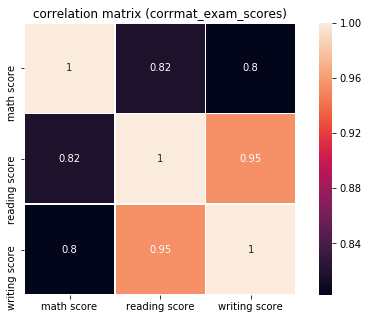

In [59]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
# draw the heatmap using seaborn.
sns.heatmap(corrmat_exam_scores, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (corrmat_exam_scores)")
plt.show()

Reading and writing have the highest correlation.